<div hidden=True>
    author: Marco Angius
    company: TomorrowData srl
    mail: marco.angius@tomorrowdata.io
    notebook-version: nov20-2.1
    
</div>

# Hands-on 2: Unsupervised Learning
### Version 2.1

This section is meant for learning the Scikit-Learn APIs end provide a playground for machine learning unsupervised tasks.

[Scikit-Learn](https://scikit-learn.org/stable/index.html#) is a library for data mining and data analysis. It  includes models for classification, regression and clustering. It is built on top of NumPy. SciPy and matplotlib. 

For the purpose of this playground, to get familiar with the Scikit-Learn APis, we would use [Toy Datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets) available in the library. 

Datasets in `sklearn.datasets` return a *Bunch*:
> Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the regression targets, ‘DESCR’, the full description of the dataset, and ‘filename’, the physical location of boston csv dataset (added in version 0.20).

In this notebook we also use the `sklearn.datasets.make_blobs` and `sklearn.datasets.make_moons` functions which is of help in generating synthetic data for unsupervised tasks. See the [Generated datasets](https://scikit-learn.org/stable/datasets/index.html#generated-datasets) section for more details.

### mglearn library 
For visualizing the results obtained with our models we are going to employ an existing library made by Andreas C. Muller (author of the book *Introduction to Machine Learning with Python*). The library is available in the [github repository](https://github.com/amueller/mglearn).

In [1]:
!pip install mglearn==0.1.9

In [2]:
from sklearn.datasets import load_breast_cancer, make_blobs, fetch_lfw_people, make_moons
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [3]:
R_STATE = 99

## Dataset load
The **breast cancer** and the **faces** datasets are used in this notebook for applying scaling and PCA transformations.

In [4]:
breast_ds = load_breast_cancer()
faces_ds = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 1**
- check the datasets. Use `print(ds.DESCR)`to print information for each of them.

</div>

In [5]:
print(breast_ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(faces_ds.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

## Scaling the data
Here we are going to see how the effect of data scaling has an impact on supervised models before introducing unsupervised models. 

The `MinMaxScaler`, `StandardScaler`, `RobustScaler` e `Normalizer` are sklearn models and follows the same API convention that we have seen in the supervised section. This means you can use `fit()` and `transform()` for preparing the model and then scale the data.

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 2: Scaling Data**


Using the *breast cancer* dataset apply the different scalers and check how data has changed.
- MinMaxScaler: scales features in between the provided ranges 
- RobustScaler: scales the features bases on the quartiles
- StandardScaler: scales the features based on the mean and the variance (column-wise)
- Normalzer: normalizes each row in order to have unit norm (row-wise)

You can use the provided function to plot the data and visually see the differences.

**NOTE**: Before applying any transformation select two features from the *breast cancer* in order to visualize them.

</div>

In [7]:
X, y = breast_ds.data, breast_ds.target

In [8]:
pd.DataFrame(X, columns=breast_ds.feature_names) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
scaling_features = breast_ds.feature_names[:2]
scaling_X = pd.DataFrame(X[:, :2], columns=scaling_features)

In [10]:
scaling_X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [11]:
scaler_mms = MinMaxScaler()
scaler_mms = scaler_mms.fit(scaling_X)
X_mms = scaler_mms.transform(scaling_X) 

In [12]:
scaler_mms = MinMaxScaler()
X_mms = scaler_mms.fit_transform(scaling_X) 

In [13]:
X_mms = MinMaxScaler(feature_range=(0,100)).fit_transform(scaling_X)
X_rs  = RobustScaler().fit_transform(scaling_X)
X_ss  = StandardScaler().fit_transform(scaling_X)
X_n   = Normalizer().fit_transform(scaling_X)

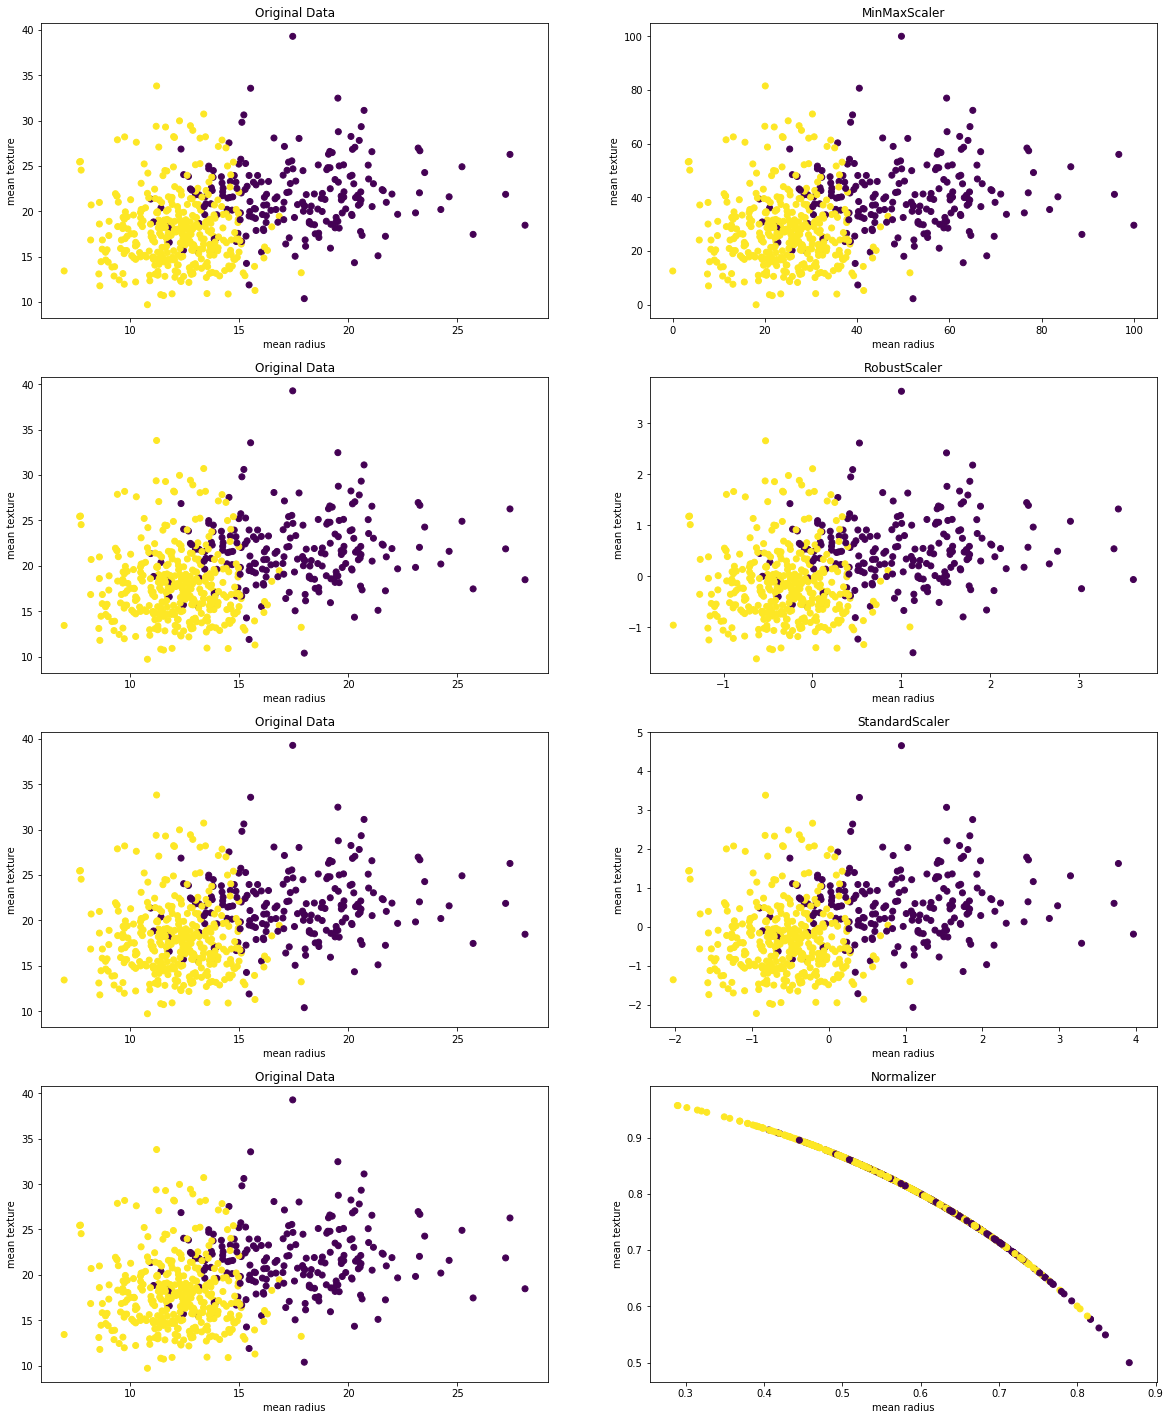

In [14]:
scaled = [X_mms, X_rs, X_ss, X_n]
names = ["MinMaxScaler", "RobustScaler", "StandardScaler", "Normalizer"]

fig, axes = plt.subplots(4, 2, figsize=(20, 25) )
for i, ax_row in enumerate(axes):
    ax_0 = ax_row[0]
    ax_1 = ax_row[1]
    
    ax_0.scatter(X[:, 0], X[:, 1], c=y)
    ax_1.scatter(scaled[i][:, 0], scaled[i][:, 1], c=y)
    ax_0.set_title("Original Data")
    ax_1.set_title(names[i])
    for ax in [ax_0, ax_1]:
        ax.set_xlabel(scaling_features[0])
        ax.set_ylabel(scaling_features[1])

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 3: Observing model performances for different scalers**

For convenience, a split into training and test sets is already provided for the *breast cancer* dataset (do not focus on the details for now, this will be part of next hands-ons).

- `X_train`: features for the training set 
- `y_train`: labels for the training set
- `X_test`: features for the test set
- `y_test`: labels for the test set

    
The model for this experiment is a Support Vector Machine (SVM) for classification. For details about this model please refer to the [scikit-learn dedicated page](https://scikit-learn.org/stable/modules/svm.html#svm-classification) to SVM. 
    
A function is provided in order to test the model performances on different scaling of the same data. The function takes the training and test sets as tuples. Each tuple should contain features and labels.

<hr>

Tasks: 
    
1. Fit two or more scalers on the training set;
2. Transform both training and test sets;
3. Use the `compute_perf_SVC()` function for comparing the scaled data with the base model;
4. Print the results.

</div>

<div class="alert alert-warning" role="alert">
    
<img src="./icons/book.png"  width="20" height="20" align="left"> &nbsp;  **Theory: Scaling Training and Test**


Usually when training machine learning models data is split in two sets: one for training and one for test. This allows to have some data for assessing the model generalization performances. When data scaling is applied, the model used for scaling the data should be fit on the *training* dataset. Then, the same scaling model have to be used in the *test set*. If the test set is not scaled the same way as the training set is, performances may be worst!


</div>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
def compute_perf_SVC(training_set, test_set): 
    Xtr, ytr, Xte, yte = *training_set, *test_set
    svc = SVC(C=100, gamma="auto", random_state=11)
    svc.fit(Xtr, ytr)
    score = svc.score(Xte, yte)
    return score

In [107]:
minmaxs  = MinMaxScaler().fit(X_train)
robsuts  = RobustScaler().fit(X_train)
stds     = StandardScaler().fit(X_train)
norms    = Normalizer().fit(X_train)

In [18]:
# transform train
Xtr_mms  = minmaxs.transform(X_train)
Xtr_rs   = robsuts.transform(X_train)
Xtr_ss   = stds.transform(X_train)
Xtr_ns   = norms.transform(X_train)

In [19]:
# transform test
Xte_mms  = minmaxs.transform(X_test)
Xte_rs   = robsuts.transform(X_test)
Xte_ss   = stds.transform(X_test)
Xte_ns   = norms.transform(X_test)

In [20]:
compute_perf_SVC((X_train, y_train), (X_test, y_test))

0.6293706293706294

In [21]:
compute_perf_SVC((Xtr_mms, y_train), (Xte_mms, y_test))

0.965034965034965

In [22]:
compute_perf_SVC((Xtr_ns, y_train), (Xte_ns, y_test))

0.8951048951048951

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 1: Observe Scaled Data**

Use `pandas.DataFrame()` to construct dataframes starting from different scaled versions of the *breast cancer* data. In order to access the feature names use the `breast_ds.feature_names` attribute. 

- Use the `df.describe()` method to compare the data ans see the effect of the different scaling algorithms.

</div>

In [116]:
X, y = breast_ds.data, breast_ds.target

In [119]:
res = pd.DataFrame(X, columns=breast_ds.feature_names).describe().T
res[['mean', 'std', 'min', 'max']].head(5)

,mean,std,min,max
mean radius,14.127292,3.524049,6.98100,28.1100
mean texture,19.289649,4.301036,9.71000,39.2800
mean perimeter,91.969033,24.298981,43.79000,188.5000
mean area,654.889104,351.914129,143.50000,2501.0000
mean smoothness,0.096360,0.014064,0.05263,0.1634


In [120]:
res = pd.DataFrame(minmaxs.fit_transform(X), columns=breast_ds.feature_names).describe().T
res[['mean', 'std', 'min', 'max']].head(5)

,mean,std,min,max
mean radius,0.338222,0.166787,0.0,1.0
mean texture,0.323965,0.145453,0.0,1.0
mean perimeter,0.332935,0.167915,0.0,1.0
mean area,0.216920,0.149274,0.0,1.0
mean smoothness,0.394785,0.126967,0.0,1.0


## Principal Component Analysis
In this section we are going to use PCA for both visualization and features extraction. 

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 4: PCA - Visualization**

We can visualize the *breast cancer* features using its first two principal components.
 
- Check the original data dimension;
- Use `sklearn.decomposition.PCA(n_components)` for selecting the number of principal components and apply PCA on the *breast cancer* features;
- Use the provided function `plot_projected_data(X_transformed)` to plot the dataset projected onto the new subspace (defined by the principal components);
- Observe the two principal components: each one presents K coefficients and all together they define a base for a new subspace. Use the `plot_heatmap_coefficients(model)` to analyze the coefficients.

    
Some questions:
1. Does scaling affect the PCA ?
   
</div>

In [23]:
def plot_projected_data(X_transformed, dataset=breast_ds):
    plt.figure(figsize=(8, 8))
    plt.title("Projected Data")
    mglearn.discrete_scatter(X_transformed[:, 0], X_transformed[:, 1], dataset.target)
    plt.legend(dataset.target_names, loc="best")
    plt.gca().set_aspect("equal")
    plt.xlabel("First principal component", size=13)
    plt.ylabel("Second principal component", size=13)

In [24]:
pca = PCA(n_components=2)

In [25]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
X_pca2 = pca.transform(X)

In [27]:
X_pca2.shape

(569, 2)

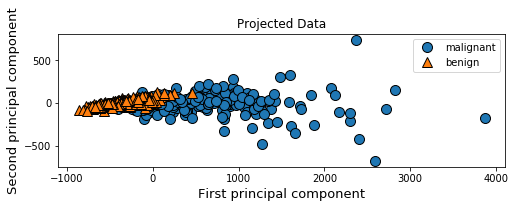

In [28]:
plot_projected_data(X_pca2)

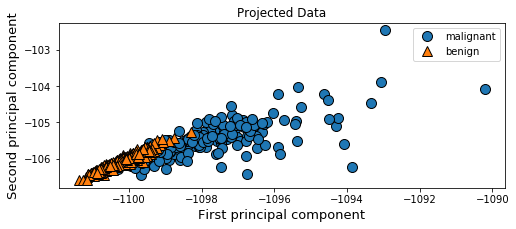

In [29]:
X_robs = robsuts.transform(X) # D30
X_robs_pca2 = pca.transform(X_robs) # D2 applying PCA
plot_projected_data(X_robs_pca2)

In [30]:
pca_scaled = PCA(n_components=2)
pca_scaled.fit(X_robs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
def plot_heatmap_coefficients(model, dataset=breast_ds):
    plt.matshow(model.components_, cmap='viridis')
    plt.yticks([0, 1], ["First component", "Second component"])
    plt.colorbar()
    plt.xticks(range(len(dataset.feature_names)),
    dataset.feature_names, rotation=60, ha='left')
    plt.xlabel("Feature")
    plt.ylabel("Principal components")

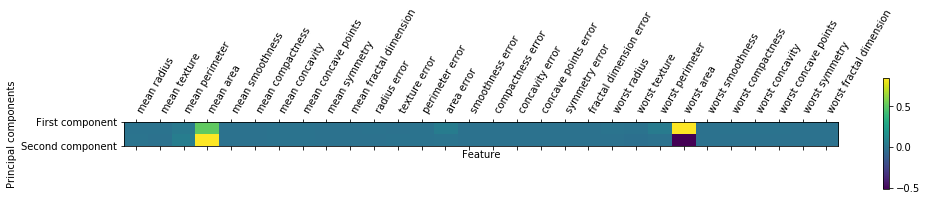

In [32]:
# PCA model fit on not-scaled data
plot_heatmap_coefficients(pca)

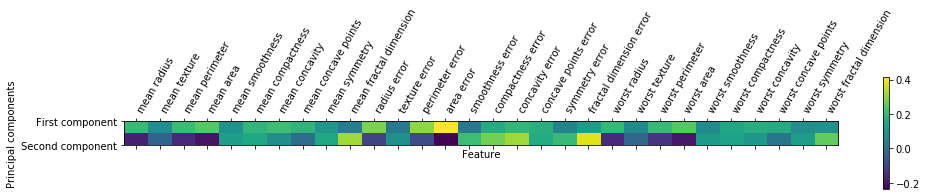

In [33]:
# PCA model fit on scaled data
plot_heatmap_coefficients(pca_scaled)

<div class="alert alert-warning" role="alert">
    
<img src="./icons/book.png"  width="20" height="20" align="left"> &nbsp;  **Theory: Coefficients' Interpretation**

Principal components represent directions on the original data and they are a combination of the original features. Observing the coefficients' magnitude for one component, they give a clue about the correlation between features for a particular direction. In the case of the first component the are all of the same sign meaning that if we observe points increasing in the component direction also the original features tends to increase as well. 

For the second component is different due to we have mixed signs.

</div>

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 2: PCA and Model Performances**

    
Evaluate model performances with and without PCA as it has been already done in exercise 3. Use again `compute_perf_SVC()` function and the *breast cancer* dataset for this purpose.

</div>

In [125]:
pca = PCA(n_components=1)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [126]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [127]:
print("Perfomance SVC with PCA: ", compute_perf_SVC((X_train_pca, y_train), (X_test_pca, y_test)))

Perfomance SVC with PCA:  0.5111111111111111


In [128]:
print("Perfomance SVC: ", compute_perf_SVC((X_train, y_train), (X_test, y_test)))

Perfomance SVC:  0.5111111111111111


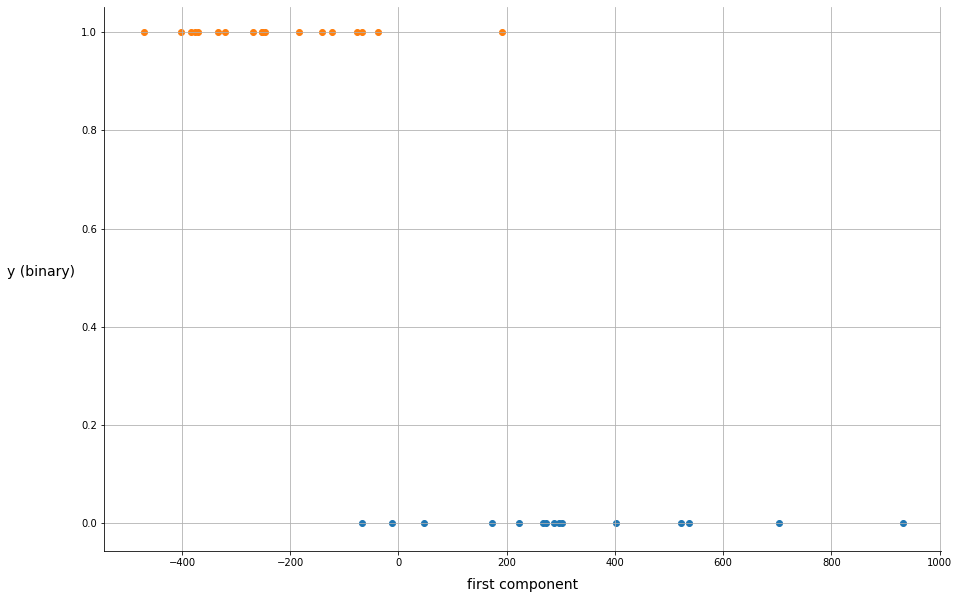

In [129]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
plt.scatter(X_test_pca[y_test == 0], y_test[y_test == 0])
plt.scatter(X_test_pca[y_test == 1], y_test[y_test == 1])
ax.grid()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
_ = ax.set_xlabel("first component", rotation=0, labelpad=10, fontdict={'size':14})
_ = ax.set_ylabel('y (binary)', rotation=0, labelpad=40, fontdict={'size':14})

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 5: PCA - Feature Extraction using the Faces dataset**

It is possible to use PCA for feature extraction in order to use the new features for training a supervised model and achieve better results in terms of classification scores.

- Check dimensionality for the *faces* dataset;
- Use the *faces* dataset and apply PCA in order to extract 100 principal components;
- Train and test a KNN classifier on the original features (the `check_knn_performances()` function is provided for the purpose);
- Train and test a KNN classifier on the extracted PCA components (the `check_knn_performances()` function is provided for the purpose);
- Plot, using the provided `plot_pca_face_components()` function, the extracted principal components;

Data have been prepared in `X_faces` and `y_faces`.

<br>
    
Extra:
- Play with the `whitening` hyper-parameter of PCA and check the results;
- Try with a different number of principal components.
 
</div>

In [66]:
image_shape = faces_ds.images[0].shape
def plot_pca_face_components(model):
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
    subplot_kw={'xticks': (), 'yticks': ()})
    for i, (component, ax) in enumerate(zip(model.components_, axes.ravel())):
        ax.imshow(component.reshape(image_shape), cmap='gray')
        ax.set_title("{}. component".format((i + 1)))

In [67]:
def check_knn_performances(X_train, X_test, y_train, y_test): 
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

In [73]:
X, y = faces_ds.data, faces_ds.target

# apply a mask in order to make the data skewed (take up to 50 images of each person)
mask = np.zeros(y.shape, dtype=np.bool)
for target in np.unique(y):
    mask[np.where(y == target)[0][:50]] = 1
    
# scale to greyscale for numeric stability
X_faces, y_faces = X[mask] / 255., y[mask]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_faces, y_faces, random_state=0)

In [71]:
X.shape

(3023, 5655)

In [79]:
faces_ds.target_names[y_train[0]]

'Gray Davis'

In [102]:
pca_faces = PCA(n_components=100, whiten=True, random_state=R_STATE)

In [103]:
pca_faces.fit(X_train)

PCA(n_components=100, random_state=99, whiten=True)

In [104]:
X_train_pcaf100, X_test_pcaf100 = pca_faces.transform(X_train), pca_faces.transform(X_test)

In [99]:
# model perf with original data
check_knn_performances(X_train, X_test, y_train, y_test)

Test set accuracy: 0.28


In [105]:
check_knn_performances(X_train_pcaf100, X_test_pcaf100, y_train, y_test)

Test set accuracy: 0.34


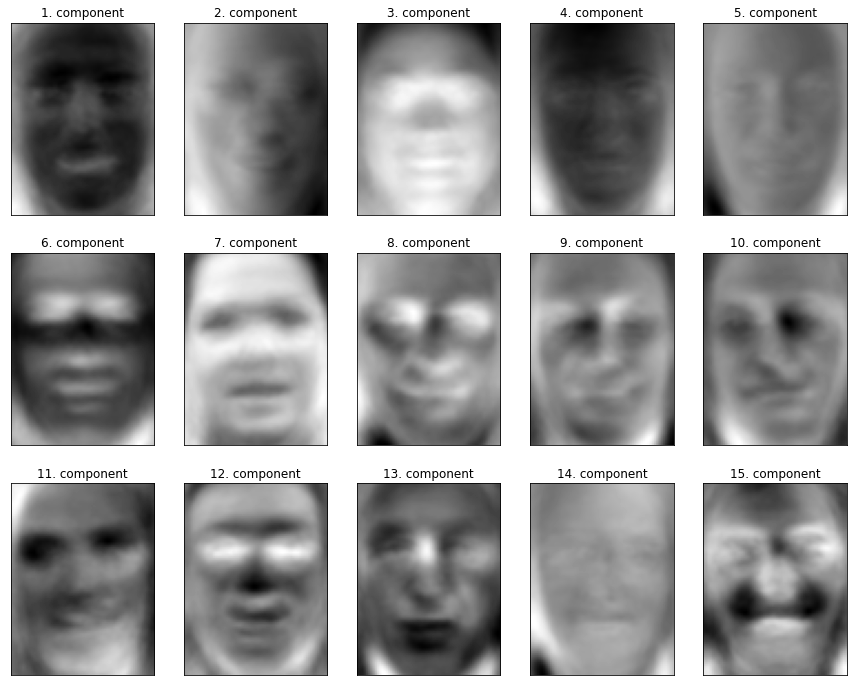

In [91]:
plot_pca_face_components(pca_faces)

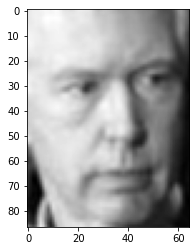

In [80]:
f = plt.figure()
ax = f.add_subplot()
ax.imshow(X_train[0].reshape(image_shape), cmap='gray')

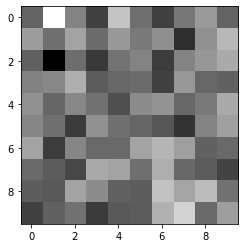

In [95]:
f = plt.figure()
ax = f.add_subplot()
ax.imshow(X_train_pcaf100[0].reshape(10, 10), cmap='gray')

Text(0.5, 1.0, 'First Example with only 100 compoenents')

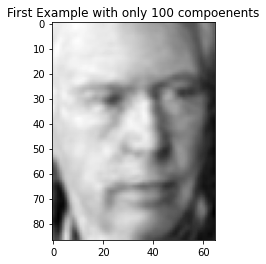

In [101]:
f = plt.figure()
ax = f.add_subplot()
ax.imshow(pca_faces.inverse_transform(X_train_pcaf100[0]).reshape(image_shape), cmap='gray')
ax.set_title("First Example with only 100 compoenents")

<div class="alert alert-warning" role="alert">
    
<img src="./icons/book.png"  width="20" height="20" align="left"> &nbsp;  **Theory: PCA for Face Recognition**

It is possible to observe each component extracted by PCA from the *Faces* dataset. Some components seams to be extracting differences between the face and the background while others are encoding the lightning differences amongst different zones of the face.  

In addition, given some coefficients $b_1, b_2, ... , b_k$ it is possible to express a test point (an image of a person) as a linear combination of those components.
</div>

## Clustering
Finally we look into unsupervised learning models and in particular we are going to see **K-Meams** and **DBSCAN**. 

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 6: K-Means**
- generate a random dataset with `make_blob()` (by default it has 2 features and 100 samples)
- plot the generated random dataset using the `plot_blob(data)` function
- apply kmeans to the random dataset using `KMeans(n_clusters=3)`
- plot the results with the provided `plot_clusters(data, model)` function 
</div>

In [106]:
def plot_clusters(data, model):
    # from sklearn 
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=[10,7])
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Pastel1, alpha=0.7,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], '.', markersize=10)
    # Plot the centroids as a white X
    centroids = model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=3,
                color='r', zorder=10)
    plt.title('K-means clustering', size=15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("feature 1", size=13)
    plt.ylabel("feature 2", size=13)
    plt.show()

In [107]:
def plot_blob(data):
    f = plt.figure(figsize=[10,7])
    ax = f.add_subplot()
    ax.scatter(X[:, 0], X[:, 1])
    ax.set_title("Scatter Plot of random blobs", fontdict={'fontsize':15})
    ax.set_xlabel("feature 1", fontdict={'fontsize':13})
    ax.set_ylabel("feature 2", fontdict={'fontsize':13})

In [108]:
X, y  = make_blobs(random_state=10)

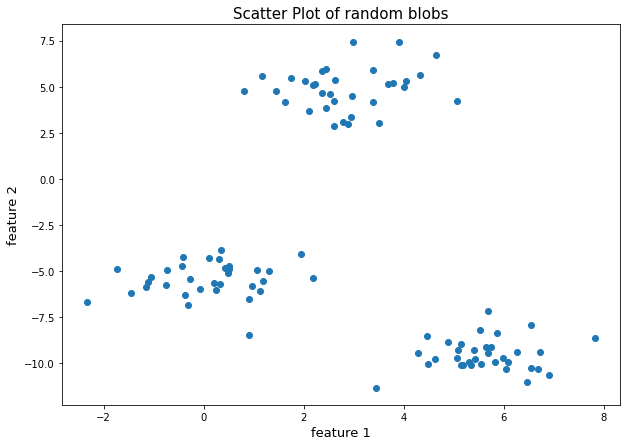

In [109]:
plot_blob(X)

In [126]:
km = KMeans(n_clusters=3, init=np.array([[8, -10], [8, -10], [8, -10 ]]))

In [127]:
km.fit(X)

/home/marco/miniconda3/envs/mlcourse/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[  8, -10],
       [  8, -10],
       [  8, -10]]),
       n_clusters=3)

In [128]:
km.cluster_centers_

array([[ 2.89504171, -7.53408753],
       [ 2.34107224,  4.44587275],
       [ 3.98920748,  5.80722659]])

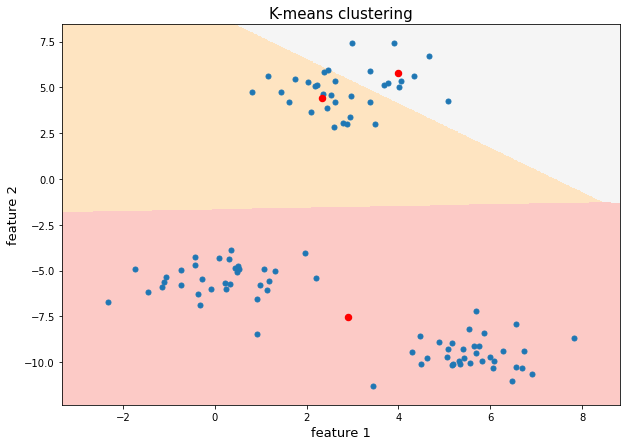

In [129]:
plot_clusters(X, km)

In [115]:
km.predict([[0, -2.5]])

array([0], dtype=int32)

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 3**:  Try different values of k and plot the results. It is also possible to specify the initialization for the centroids.
</div>

<hr>


### When K-Means fails
K-means has some drawbacks: 
- it considers only convex shapes (radius of the cluster's centroids)
- it assumes cluster of the same size (diameter)
- it does not take into account directions' importance 
- k as hyperparameter

Lets consider two cases when kmeans fails to identify potentially "meaningful" clusters. The two dataset are already given for this purpose. Then we will see a different model which can solve these limitations.

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 7: K-Means Failure**
- use the `X_blob` to fit and plot the result of kmeans on a stretched blob dataset
- use the `X_moons` to fit and plot the result of kmeans on the moons dataset
</div>

In [130]:
X_blob, y_blob = make_blobs(random_state=110, n_samples=600)
rng = np.random.RandomState(1200)
transformation = rng.normal(size=(2, 2))
X_blob = np.dot(X_blob, transformation)

In [131]:
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=10)

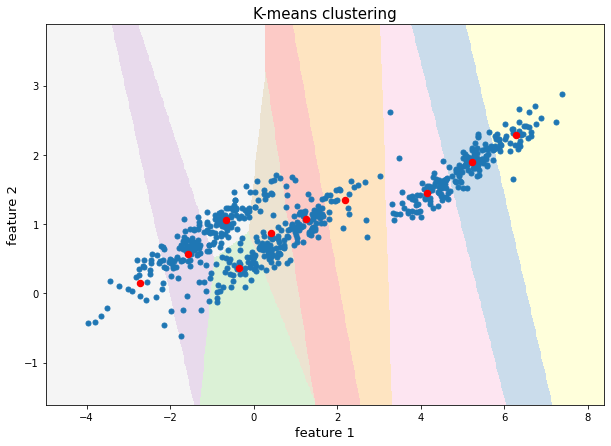

In [133]:
kmb = KMeans(n_clusters=10)
kmb.fit(X_blob)
plot_clusters(X_blob, kmb)

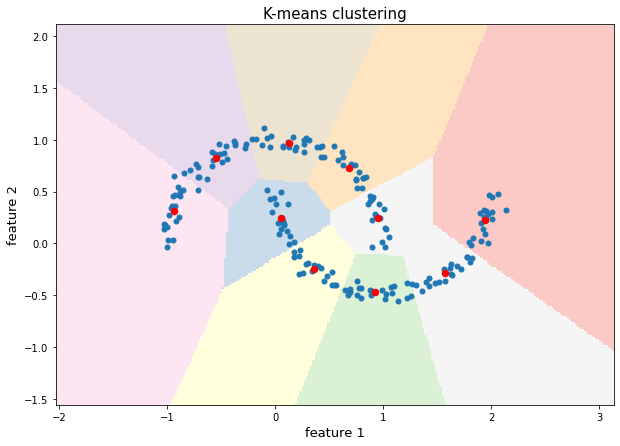

In [135]:
kmm = KMeans(n_clusters=10)
kmm.fit(X_moons)
plot_clusters(X_moons, kmm)

### Use DBSCAN
We use a more sophisticated clustering algorithm which creates cluster bases on the data point density. One of the advantages of DBSCAN is the needless of setting a k value. For more details about DBSCAN see the scikit-learn [dedicated page](https://scikit-learn.org/stable/modules/clustering.html#dbscan).

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 8: DBSCAN**
- use DBSCAN to solve the above problems (reuse the already provided data)
- try different parameters for DBSCAN: 
    - `eps`: set this to implicitly control the number of clusters
    - `min_sample`: in less dense regions determines if a point a noise one or belonging to a cluster
- use the `plot_dbscan_cluster()` to observe the results
</div>

In [136]:
def plot_dbscan_clusters(model, data):
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    labels = model.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=[10, 7])
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_, size=15)
    plt.xlabel("feature 1", size=13)
    plt.ylabel("feature 2", size=13)
    plt.show()

In [145]:
dbscan = DBSCAN(eps=0.5, min_samples=2)

In [146]:
dbscan.fit(X_blob)

DBSCAN(min_samples=2)

In [147]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

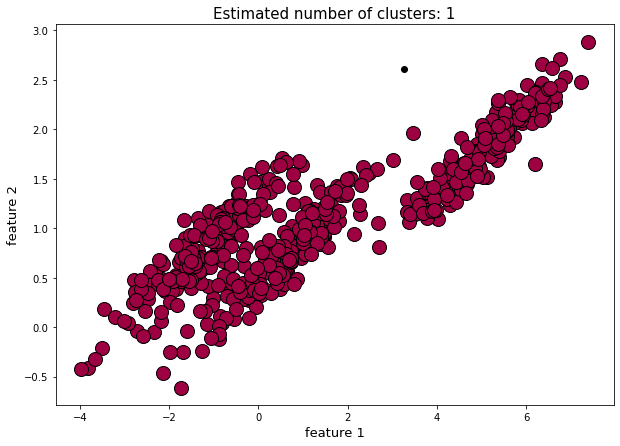

In [148]:
plot_dbscan_clusters(dbscan, X_blob)

In [153]:
dbscan = DBSCAN(eps=0.2, min_samples=2)

In [154]:
dbscan.fit(X_moons)

DBSCAN(eps=0.2, min_samples=2)

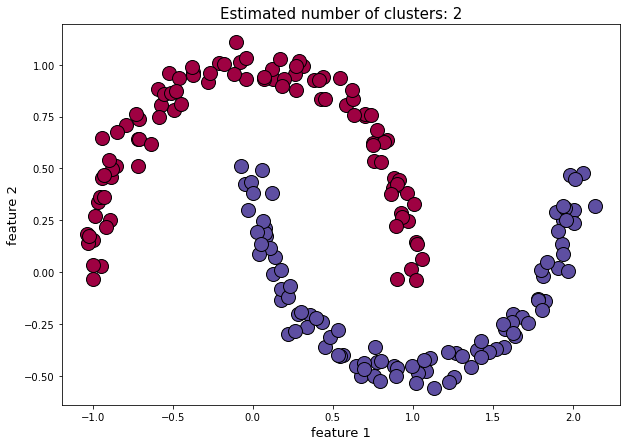

In [155]:
plot_dbscan_clusters(dbscan, X_moons)

## Homeworks

In [101]:
from sklearn.datasets import load_wine
wine_ds = load_wine()
print(wine_ds.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task**: Apply scaling and PCA to the **Wine** dataset. 

<br>
Do not pay attention now on the model used for classification, this exercise is meant for understanding an important consequence of scaling the data when adopting PCA. 

1. Split training and test (this has been done for you);
2. Check model performances over the original data(use the provided `check_knn_performances` function as we did in the exercises). This is done for having a baseline reference;
3. Transform the data with a `StandardScaler` and save it in a different variable (we need it for comparisons);
4. Apply PCA to both non-standardized data and the standardized one;
5. Check model performances with both version of the data (PCA and Standardization + PCA);
6. Plot the first and second component of the data with PCA and the first and second component  of the data with Standardization + PCA (use the provided `plot_scaling_pcs` function);
7. Compare the results and observe the difference between the two plots.

<hr>
    
Check the [reference](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) here for more details (do this after solving the exercise)
    
[**SOLUTION**](../solutions/handson2/solution.py)


</div>

In [90]:
def plot_scaling_pcs(X_pca, X_scaled_pca, y):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))


    for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
        ax1.scatter(X_pca[y == l, 0],
                    X_pca[y == l, 1],
                    color=c,
                    label='class %s' % l,
                    alpha=0.5,
                    marker=m
                    )

    for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
        ax2.scatter(X_scaled_pca[y == l, 0],
                    X_scaled_pca[y == l, 1],
                    color=c,
                    label='class %s' % l,
                    alpha=0.5,
                    marker=m
                    )

    ax1.set_title('Training dataset after PCA')
    ax2.set_title('Standardized training dataset after PCA')

    for ax in (ax1, ax2):
        ax.set_xlabel('1st principal component')
        ax.set_ylabel('2nd principal component')
        ax.legend(loc='upper right')
        ax.grid()

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **PCA & Scaling Tip 1**: 
Be careful to fit both `StandardScaler` and `PCA` on the Training Dataset and use the fit models for transforming the *Test Data*. Why this? Our *Test Data*  simulates new data as if the model is put into production and it should be data you haven't observed yet, thus your only prior information is your training data set.  
</div>

In [130]:
def check_knn_performances(X_train, X_test, y_train, y_test): 
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

In [131]:
# 1: split test and training
X, y = wine_ds.data, wine_ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=R_STATE)

In [132]:
# 2: check model performance with original data
check_knn_performances(X_train, X_test, y_train, y_test)

Test set accuracy: 0.71


In [133]:
# 3: fit the scaler with the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc, X_test_sc = scaler.transform(X_train), scaler.transform(X_test)

In [134]:
# 4: apply pca to both normalized and no-normalized
pca_vanilla = PCA(n_components=5)
pca_vanilla.fit(X_train)
pca_scaled = PCA(n_components=5)
pca_scaled.fit(X_train_sc)

X_train_pca, X_test_pca = pca_vanilla.transform(X_train), pca_vanilla.transform(X_test)
X_train_scaled_pca, X_test_scaled_pca = pca_scaled.transform(X_train_sc), pca_scaled.transform(X_test_sc)

In [135]:
# 5: check performances
check_knn_performances(X_train_pca, X_test_pca, y_train, y_test)
check_knn_performances(X_train_scaled_pca, X_test_scaled_pca, y_train, y_test)

Test set accuracy: 0.71
Test set accuracy: 0.98


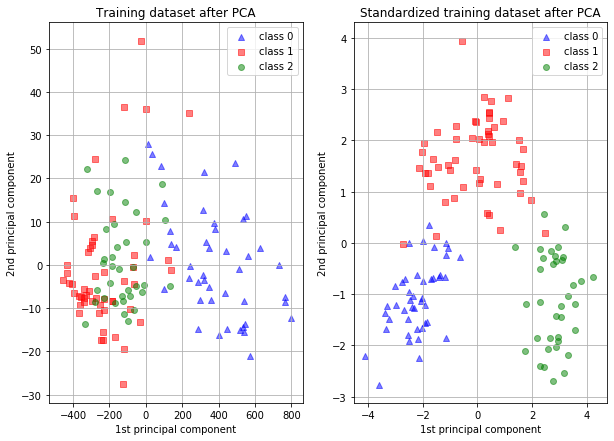

In [136]:
# 6 & 7: plot
plot_scaling_pcs(X_train_pca, X_train_scaled_pca,  y_train)

<div class="alert alert-warning" role="alert">
    
<img src="./icons/book.png"  width="20" height="20" align="left"> &nbsp;  **Theory: Feature Scaling** 

For some ML applications and models, the data scaling may have an impact on the obtained results and performance provided by a given model. An example is PCA, for which the components that maximize the variance are the key principle of this technique. If there are components which vary more than others, due to their nature, this may affect how principal components are computed.

Another application where scaling the feature is a must is for Neural Networks. Why this is important will be a subject of Lecture 4.
</div>

<hr>

<div hidden=True>
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/smashicons" title="Smashicons">Smashicons</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp;Icon made by <a href="https://www.flaticon.com/authors/pixelmeetup" title="Pixelmeetup">Pixelmeetup</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/new.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/pixel-perfect" title="Pixel perfect">Pixel perfect</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/popcorns-arts" title="Icon Pond">Icon Pond</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/book.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/popcorns-arts" title="Icon Pond">Icon Pond</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>
    
</div>